In [2]:
# -*- coding: utf-8 -*-
'''
@File 	: e2eproj.ipynb
@Time 	: 2023/11/11 20:28:38
@Author : Di
'''

'\n@File \t: e2eproj.ipynb\n@Time \t: 2023/11/11 20:28:38\n@Author : Di\n'

## 下载数据

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") #tarball压缩包
    if not tarball_path.is_file():#如果文件不存在
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)#下载文件
        with tarfile.open(tarball_path) as housing_tarball:#打开压缩包 with语句会自动关闭文件
            housing_tarball.extractall(path="datasets")#解压到datasets文件夹
    return pd.read_csv(Path("datasets/housing/housing.csv"))#返回pandas的DataFrame对象


### 观察数据

In [4]:
housing = load_housing_data()#加载数据

In [5]:
housing.head()#显示前五行数据，粗略看一下属性

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()#显示数据集的简单描述，可以观察到有些属性的值是缺失的

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() #ocean_proximity属性的值是离散的，可以看一下有哪些值，以及每个值有多少个

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

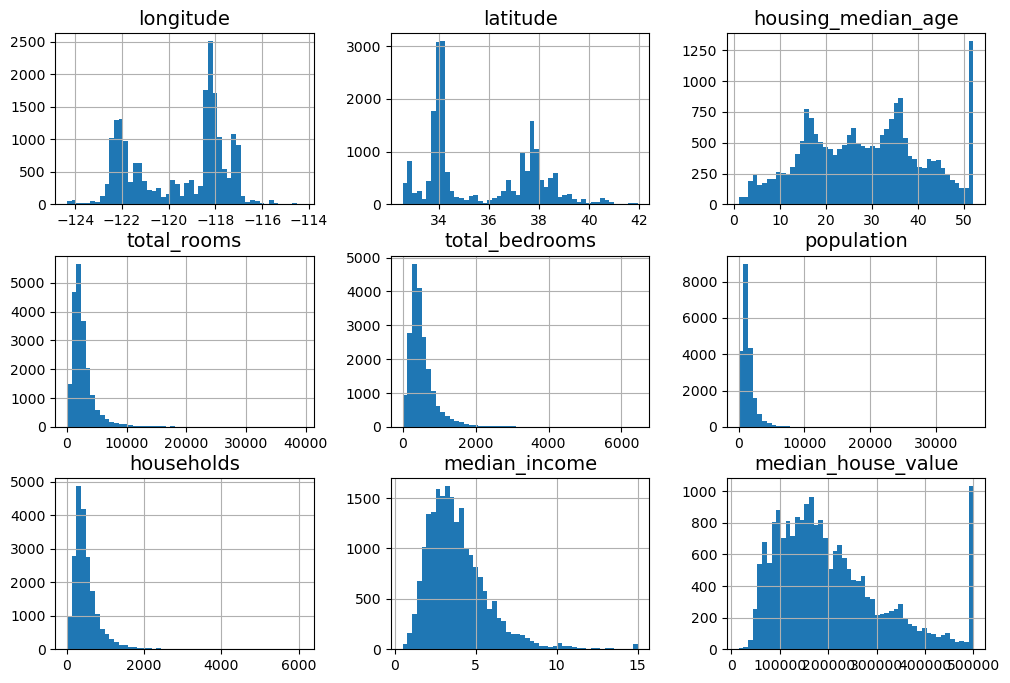

In [8]:
import matplotlib.pyplot as plt

#定义绘图的一些参数
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))#画出每个属性的直方图
plt.show()#观察到有的属性经过缩放，有的属性设置了上限，有的属性的分布不均匀

### 划分数据集

In [15]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
#加收入类别属性，pd.cut函数将连续值划分为离散值，bins参数指定划分的边界，labels参数指定划分后的值

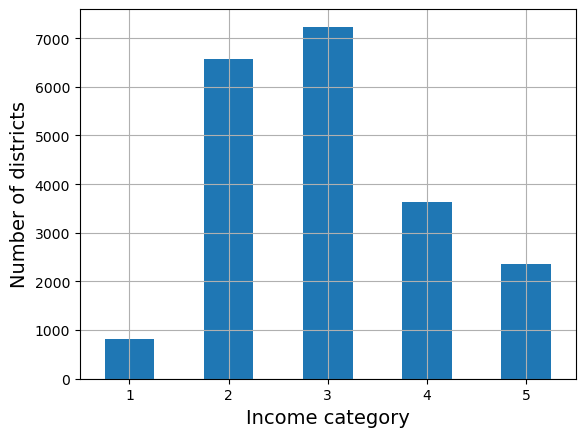

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)#画出收入类别的柱状图
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

#### 分层抽样

In [21]:
#简单的表达
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [26]:
#查看训练集和测试集的收入类别分布是否相似
strat_test_set["income_cat"].value_counts() / len(strat_test_set),strat_train_set["income_cat"].value_counts() / len(strat_train_set)

(3    0.350533
 2    0.318798
 4    0.176357
 5    0.114341
 1    0.039971
 Name: income_cat, dtype: float64,
 3    0.350594
 2    0.318859
 4    0.176296
 5    0.114462
 1    0.039789
 Name: income_cat, dtype: float64)

In [27]:
#现在可以删去income_cat列了：
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [28]:
#为了防止原始数据损失，创建训练副本(很重要)
housing = strat_train_set.copy()

### 可视化数据分布

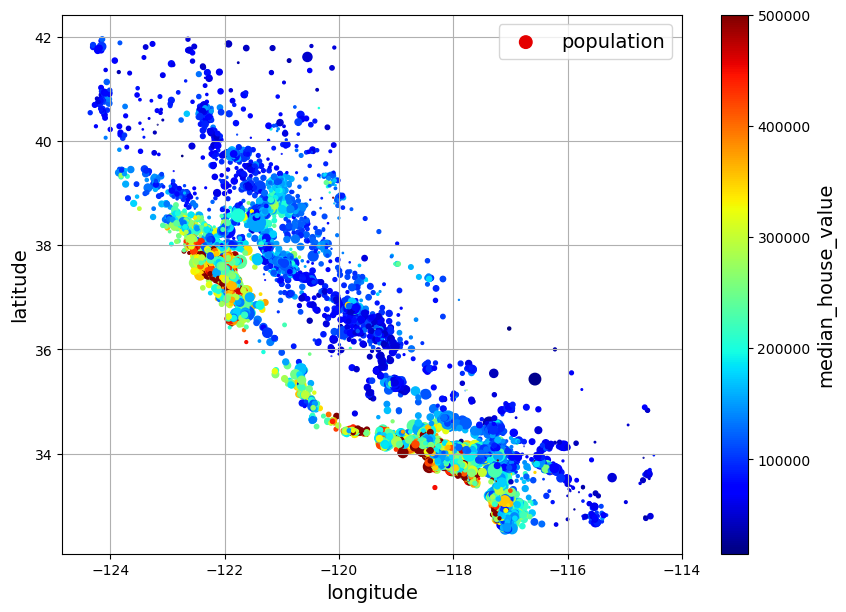

In [19]:
#可视化数据，用点的大小呈现人口数量，用颜色呈现房价中位数，横纵坐标是经纬度
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

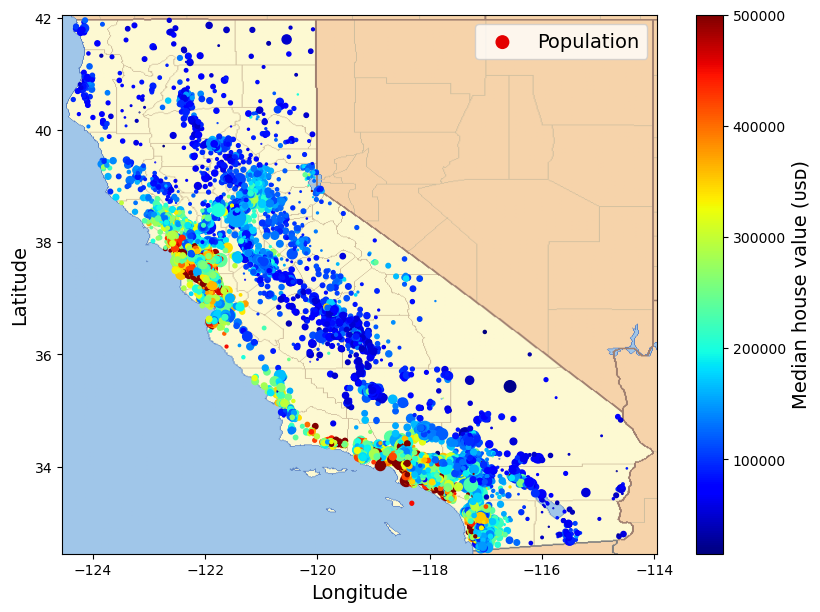

In [22]:
# Download the California image
filename = "california.png"
IMAGES_PATH = Path('Images')
if not (IMAGES_PATH / filename).is_file():
    Path(IMAGES_PATH).mkdir(parents=True, exist_ok=True)
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})#改名字为首字母大写
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename) #imread 读取图片
axis = -124.55, -113.95, 32.45, 42.05#坐标轴范围，用于显示图片，xmin-xmax;ymin-ymax
plt.axis(axis)
plt.imshow(california_img, extent=axis)#extent参数设置图片显示范围为axis

plt.show()

### 初步分析

#### 相关性矩阵建立

In [29]:
#查看相关性
corr_matrix = housing.corr()

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False) #查看与house_value相关的属性
#latitude 是负相关，说明越靠近北边，房价越低

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

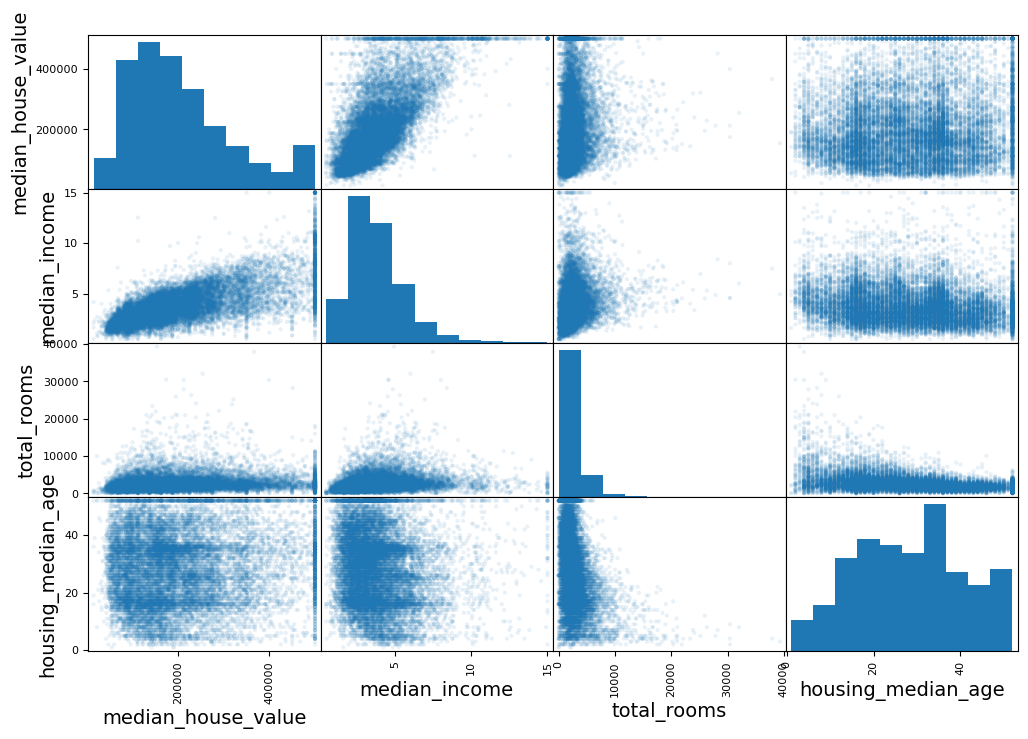

In [31]:
from pandas.plotting import scatter_matrix
#除了以上方法，我们还可以用pandas的scatter_matrix函数绘制出相关性最高的几个属性的散点图
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8),alpha=0.1)
plt.show()

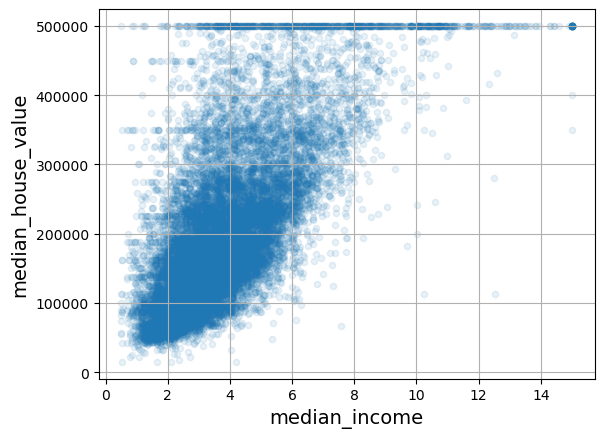

In [30]:
#最有潜力预测房价中位数的属性是收入中位数
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

### 新属性创建

In [32]:
#创建新属性
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"] #每个家庭的房间数
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"] #卧室占比
housing["people_per_house"] = housing["population"] / housing["households"] #每个家庭的人数

In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
#粗浅的规律：每个家庭的房间数量越多，房价越高。卧室占比越低，房价越高。每个家庭的人数越少，房价越高。可能对于机器学习预测是有用的

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

## 数据准备
把特征和标签分开

In [31]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 数据清洗

In [32]:
#查看缺失数据，total_bedrooms属性有缺失数据
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [33]:
housing["total_bedrooms"].isnull().sum() #查看缺失值的数量

168

In [34]:
#可以选择使用sklearn的SimpleImputer类来处理缺失数据
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")#imputer的意思是赋予。

In [35]:
housing_num = housing.select_dtypes(include=[np.number]) #选择数值属性
imputer.fit(housing_num)#适配到housing_num上，计算中位数

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_ #查看每个属性的中位数

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

### 处理文本和分类属性

In [37]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [39]:
housing_cat_1hot.toarray()[:10]

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [51]:
cat_encoder.categories_#categories_实例变量

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 特征缩放

In [40]:
from sklearn.preprocessing import MinMaxScaler
#min-max缩放，将数据缩放到0-1之间“归一化”
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [41]:
from sklearn.preprocessing import StandardScaler
#标准化，将数据缩放到均值为0，方差为1的分布中
#受到异常值的影响较小
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### 合并流程

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [55]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
    
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [56]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#完整流程
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [57]:
from sklearn import set_config

set_config(display='diagram')

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

## 选择和训练模型

### 线性回归

In [58]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

### RMSE指标

In [59]:
from sklearn.metrics import mean_squared_error

predictions_lr = lin_reg.predict(housing_prepared)
lin_rmse = mean_squared_error(housing_labels, predictions_lr,
                              squared=False)
lin_rmse


68232.83515124217

### 决策树

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
predictions_tr = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, predictions_tr,
                              squared=False)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [113]:
# predict_values = predictions_lr
# label_values = housing_labels
# 绘制散点图
def pltscatter(predict_values, label_values):

    plt.scatter(predict_values, label_values, color='b', label='Data points',s=2,alpha=0.1)

    # 添加标签和标题
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs Actual Values')

    # 添加一条对角线，表示完美预测的情况
    plt.plot([min(predict_values), max(predict_values)], [min(predict_values), max(predict_values)], color='r', linestyle='--', linewidth=1, label='Perfect Prediction')
    plt.xlim(0, 500000)
    plt.ylim(0, 500000)
    # 显示图例
    plt.legend()

    # 显示图形
    return plt.show()

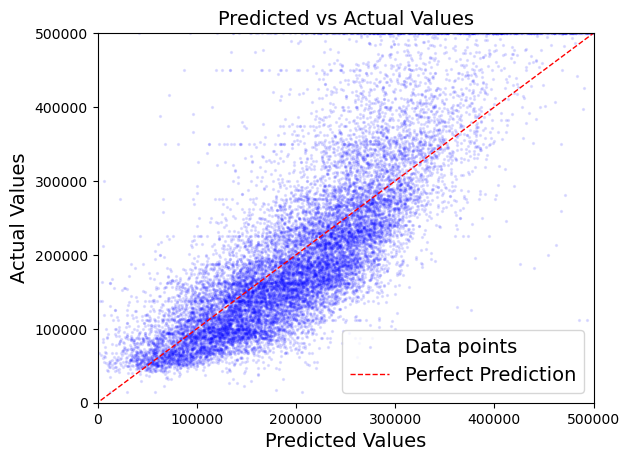

In [114]:
pltscatter(predictions_lr, housing_labels)

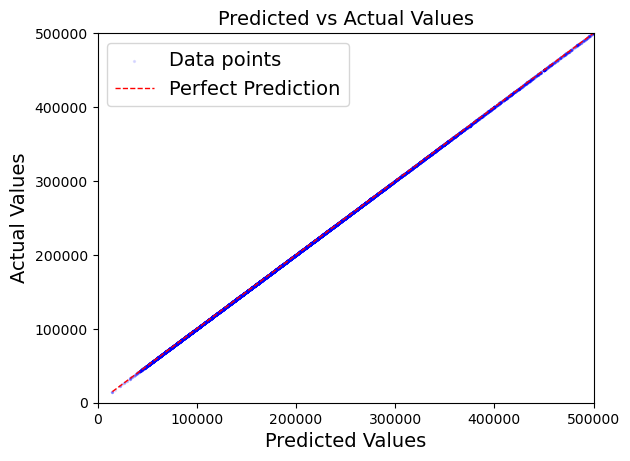

In [115]:
pltscatter(predictions_tr, housing_labels)

### 交叉验证

In [61]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [117]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     68182.480409
std       2124.960005
min      64851.643164
25%      67143.802416
50%      67511.151971
75%      69533.392994
max      71632.330436
dtype: float64

In [62]:
lin_rmses = -cross_val_score(lin_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     68307.618753
std       1032.688908
min      67256.049270
25%      67388.835816
50%      68046.518374
75%      68959.877847
max      69952.422889
dtype: float64

### 随机森林

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predictions_fr = forest_reg.predict(housing_prepared)
forest_rmse = mean_squared_error(housing_labels, predictions_fr,
                              squared=False)

In [64]:
forest_rmse

18179.26801956382

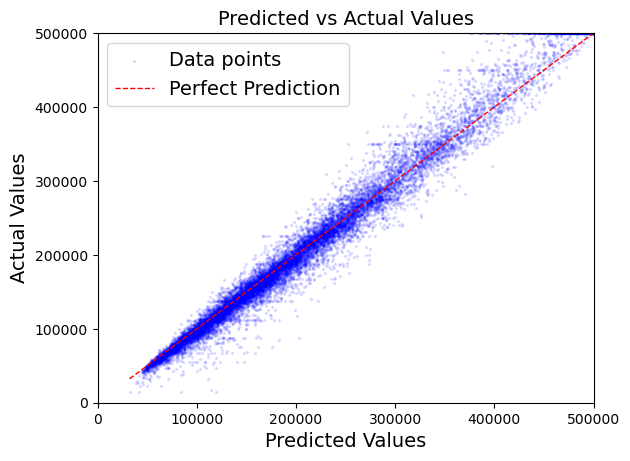

In [125]:
pltscatter(predictions_fr, housing_labels)

In [65]:
forest_rmses = -cross_val_score(forest_reg, housing_prepared, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [129]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48624.415727
std        780.336123
min      47018.044855
25%      48117.672128
50%      48782.154594
75%      49195.799325
max      49498.526914
dtype: float64

## 微调模型

调整超参

### 网格搜索

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [68]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True)

In [69]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [70]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [72]:
curves = grid_search.cv_results_
for mean_score, params in zip(curves["mean_test_score"], curves["params"]):
    print(np.sqrt(-mean_score), params)

253.28863585534867 {'max_features': 2, 'n_estimators': 3}
235.06217292049277 {'max_features': 2, 'n_estimators': 10}
228.6869844194275 {'max_features': 2, 'n_estimators': 30}
242.44117921238507 {'max_features': 4, 'n_estimators': 3}
228.06951697615662 {'max_features': 4, 'n_estimators': 10}
223.77011156204318 {'max_features': 4, 'n_estimators': 30}
242.07412991138506 {'max_features': 6, 'n_estimators': 3}
227.5314251213903 {'max_features': 6, 'n_estimators': 10}
222.54883066899347 {'max_features': 6, 'n_estimators': 30}
242.6529461257913 {'max_features': 8, 'n_estimators': 3}
226.2701261409823 {'max_features': 8, 'n_estimators': 10}
222.8461231882111 {'max_features': 8, 'n_estimators': 30}
248.40573879556595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
232.21983380704833 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
242.8523321133261 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
227.15595937404862 {'bootstrap': False, 'max_features': 3, 'n_estim

In [73]:
df = pd.DataFrame(curves)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.032870,0.006391,0.001860,0.000162,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-65581.866656,-63109.037544,...,-64155.133053,1244.825386,18,-33643.140996,-33978.133406,-33289.533427,-33407.346978,-33049.991633,-33473.629288,316.547664
1,0.101046,0.002462,0.006337,0.000823,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-54148.603419,-54230.236588,...,-55254.225138,973.756775,11,-23798.349474,-23905.340542,-23909.624137,-23964.767258,-23887.600645,-23893.136411,53.975869
2,0.302064,0.005625,0.017134,0.000266,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-52679.364170,-51518.152276,...,-52297.736843,492.798634,9,-20475.871459,-20652.524363,-20703.811900,-20556.265693,-20287.396961,-20535.174075,146.673079
3,0.050689,0.001235,0.001958,0.000159,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-57028.665237,-58609.195633,...,-58777.725378,1212.205894,13,-30428.185267,-30601.818148,-30934.074762,-29853.170311,-29425.768342,-30248.603366,540.426897
4,0.160899,0.002655,0.005687,0.000100,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-51559.462417,-51597.264803,...,-52015.704574,629.790227,8,-22417.098373,-22415.156267,-22906.236098,-22140.933358,-22581.287856,-22492.142390,250.729641


In [74]:
import seaborn as sns

# curves 是 grid_search.cv_results_

# 提取参数和得分
params = curves['params']
mean_test_scores = curves['mean_test_score']

# 创建一个DataFrame
df = pd.DataFrame(params)
df['mean_test_score'] = mean_test_scores
df.head()

,max_features,n_estimators,bootstrap,mean_test_score
0,2,3,NaN,-64155.133053
1,2,10,NaN,-55254.225138
2,2,30,NaN,-52297.736843
3,4,3,NaN,-58777.725378
4,4,10,NaN,-52015.704574


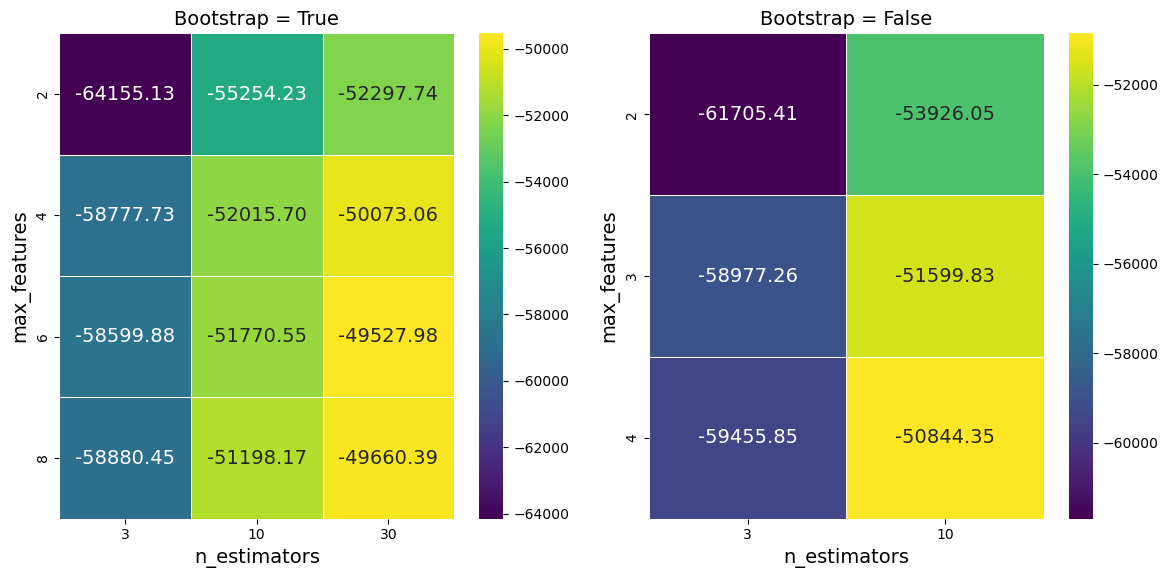

In [75]:
# 创建一个包含两个子图的画布
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df['bootstrap'] = df['bootstrap'].replace({None: 'True', False: 'False'})

# 分别绘制 bootstrap 为 0 和 1 的热图
for i, bootstrap_value in enumerate(['True', 'False']):
    subset_df = df[df['bootstrap'] == bootstrap_value]
    
    # 使用heatmap绘制热图
    sns.heatmap(data=pd.pivot_table(subset_df, values='mean_test_score', index='max_features', columns='n_estimators', aggfunc='mean', fill_value=0),
                annot=True, cmap='viridis', fmt='.2f', linewidths=.5, ax=axes[i])
    
    # 设置标题和坐标轴标签
    axes[i].set_title(f'Bootstrap = {bootstrap_value}')
    axes[i].set_xlabel('n_estimators')
    axes[i].set_ylabel('max_features')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

## 评估模型

In [76]:
final_model = grid_search.best_estimator_

In [77]:
x_test = strat_test_set.drop("median_house_value", axis=1)

median =x_test["total_bedrooms"].median()
x_test["total_bedrooms"].fillna(median, inplace=True)  # option 3


y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)

final_predictions = final_model.predict(x_test_prepared)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

In [78]:
final_rmse

49729.30562832093

### 计算置信区间

In [79]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([47377.05122878, 51975.21229793])

## 保存模型

In [80]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

### 加载模型并使用

In [82]:
# final_model_reloaded = joblib.load("my_california_housing_model.pkl")
new_data = housing.iloc[:5]  # pretend these are new districts

full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(new_data)


array([270886.93228264, 334830.60618945, 119856.18008898, 109210.92995274,
       305575.65811433])

In [83]:
from sklearn import set_config

set_config(display='diagram')

full_pipeline_with_predictor

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('linear', LinearRegression())])

In [84]:
my_model = full_pipeline_with_predictor


In [85]:
import joblib
joblib.dump(my_model, "my_model.pkl")
my_model_loaded = joblib.load("my_model.pkl")

predictions = my_model_loaded.predict(new_data)
predictions

array([270886.93228264, 334830.60618945, 119856.18008898, 109210.92995274,
       305575.65811433])